# **GRUPO 7: Rubén Gómez Blanco y Adrián Sanjuán Espejo**

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
from pandas.io.parsers import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_blobs
from scipy import integrate
from sklearn.preprocessing import PolynomialFeatures
from numpy import arange, meshgrid, sqrt
from google.colab import drive
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


# Generar dataset

In [2]:
def gen_blobs():
  classes = 6
  m = 800
  std = 0.4
  centers = np.array([[-1, 0],[1, 0],[0, 1],[0, -1],[-2,1],[-2,-1]])
  X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
  return (X, y, centers, classes, std) 

In [3]:
X, y, centers, classes, std=gen_blobs()

Text(0.5, 1.0, 'Data points by class')

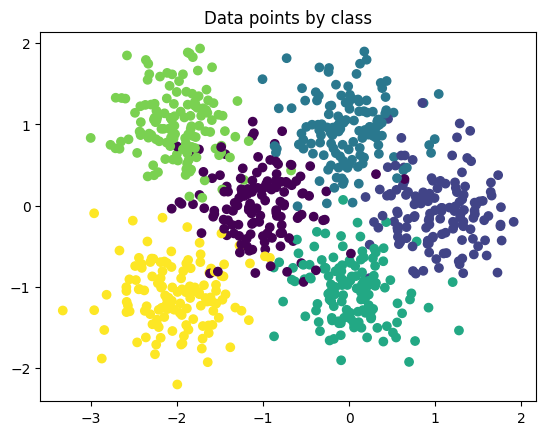

In [17]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.title('Data points by class')

In [5]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, stratify=y_rem)
len(X_train)

480

# Modelo simple

En primer lugar implementamos una red neuronal simple que consistirá en las siguientes capas: 
*   Capa 1: 10 neuronas, función de activación relu
*   Capa 2: 8, relu
*   Capa 3: 6, lineal

El objetivo es observar 'underfitting' en el modelo debido a su simpleza. Para ello analizaremos la curva de aprendizaje del modelo (error vs tamaño del conjunto de aprendizaje) y luego analizaremos el accuracy y el loss del modelo a lo largo de las epochs de entrenamiento del modelo con todos los datos de entrenamiento

In [6]:
import tensorflow
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss_list_training_1 = []
loss_list_validation_1 = []
acc_list_training_1 = []
acc_list_validation_1 = []
for tam_train in range(10,len(X_train),10):
  print(tam_train)
  model1 = Sequential([
  Dense(units=10, activation='relu'),
  Dense(units=8, activation='relu'),
  Dense(units=6, activation='linear')])
  model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  h1 = model1.fit(X_train[:tam_train],y_train[:tam_train],epochs=150,validation_data=(X_valid, y_valid),verbose = 0)
  acc_list_training_1.append(model1.evaluate(X_train[:tam_train],y_train[:tam_train], verbose = 0)[1])
  acc_list_validation_1.append(model1.evaluate(X_valid, y_valid, verbose = 0)[1])
  loss_list_training_1.append(model1.evaluate(X_train[:tam_train],y_train[:tam_train], verbose = 0)[0])
  loss_list_validation_1.append(model1.evaluate(X_valid, y_valid, verbose = 0)[0])


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470


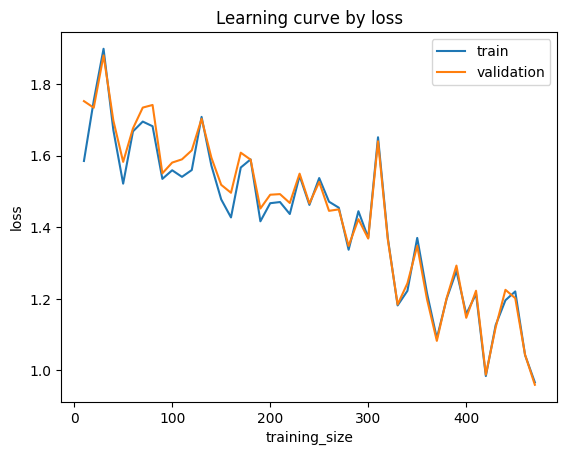

In [25]:
def plot_learning_curve(indexes, training, validation):
  plt.plot(indexes,training)
  plt.plot(indexes,validation)
  plt.title('Learning curve by loss')
  plt.ylabel('loss')
  plt.xlabel('training_size')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()
plot_learning_curve(range(10,len(X_train),10) ,loss_list_training_1,loss_list_validation_1)

En la curva de aprendizaje anterior se puede observar como para pocos datos de entrenamiento hay un error mayor en el conjunto de validación que en el de entrenamiento como es común en la curva de aprendizaje de un modelo. A partir de ahí debido a la simpleza del modelo y de la estructura de los datos, el modelo se comporta muy similar para ambos conjuntos. Se puede observar por comparación (ver curva de aprendizaje para el modelo complejo y el complejo regularizado) es que el error es muy alto para cualquier training_size lo que es típico de modelos con un sesgo elevado, es decir, underfit.

In [8]:
import tensorflow
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model1 = Sequential([
Dense(units=10, activation='relu'),
Dense(units=8, activation='relu'),
Dense(units=6, activation='linear')])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
h1 = model1.fit(X_train,y_train,epochs=150,validation_data=(X_valid, y_valid),verbose = 0)


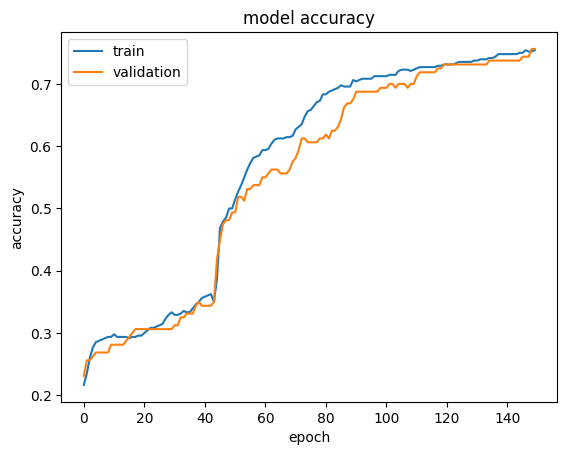

In [9]:
def plot_acc(h):
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
plot_acc(h1)

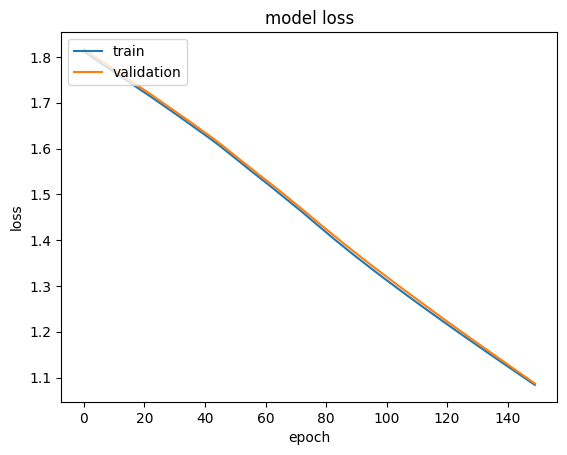

In [10]:
def plot_loss(h):
  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
plot_loss(h1)

Debido a la simpleza de este modelo no se puede apreciar el underfit del modelo en estas gráficas. Lo que sí podemos comprobar relacionado con el underfit, es que como el modelo es muy simple, la función de coste no se aplana o converge para 150 epochs lo que significa que habría que entrenar con más epochs para alcanzar el mejor modelo posible.

# Modelo complejo

En segundo lugar implementamos una red neuronal compleja que consistirá en las siguientes capas: 
*   Capa 1: 250 neuronas, función de activación relu
*   Capa 2: 100, relu
*   Capa 3: 6, lineal

El objetivo es observar 'overfitting' en el modelo debido a la complejidad de la red en comparación con la estructura de los datos que es relativamente simple. Para ello analizaremos los mismos parámetros que en el modelo anterior.

In [11]:
loss_list_training_2 = []
loss_list_validation_2 = []
acc_list_training_2 = []
acc_list_validation_2 = []
for tam_train in range(10,len(X_train),10):
  print(tam_train)
  model2 = Sequential([
  Dense(units=250, activation='relu'),
  Dense(units=100, activation='relu'),
  Dense(units=6, activation='linear')])
  model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  h2 = model2.fit(X_train[:tam_train],y_train[:tam_train],epochs=150,validation_data=(X_valid, y_valid), verbose = 0)
  acc_list_training_2.append(model2.evaluate(X_train[:tam_train],y_train[:tam_train], verbose = 0)[1])
  acc_list_validation_2.append(model2.evaluate(X_valid, y_valid, verbose = 0)[1])
  loss_list_training_2.append(model2.evaluate(X_train[:tam_train],y_train[:tam_train], verbose = 0)[0])
  loss_list_validation_2.append(model2.evaluate(X_valid, y_valid, verbose = 0)[0])

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470


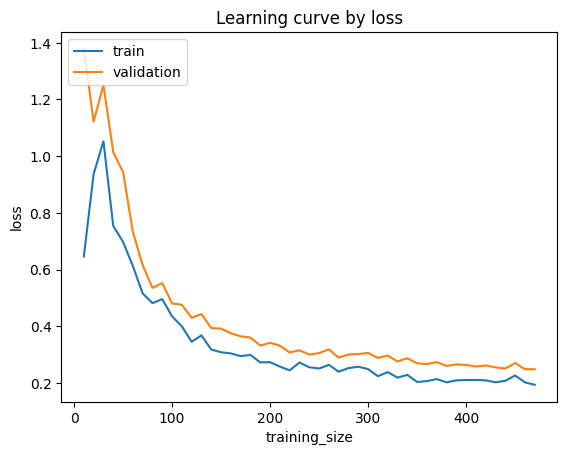

In [20]:
plot_learning_curve(range(10,len(X_train),10) ,loss_list_training_2,loss_list_validation_2)

En la curva de aprendizaje del modelo complejo se observa mejor la gráfica típica de una curva de aprendizaje. El modelo funciona mucho mejor para el conjunto de entrenamiento que para el de validación cuando se entrena con pocos datos (10 y 20). Para un training_size más grande las curvas para ambos conjuntos empiezan a comportarse de una manera similar siguiendo una tendencia descendente. Se puede observar una varianza elevada que hace que cuantos más datos de entrenamiento se utilicen para entrenar el modelo mejor funciona este para el conjunto de validación, lo cual es típico de modelos con cierto overfitting.

In [13]:
model2 = Sequential([
Dense(units=250, activation='relu'),
Dense(units=100, activation='relu'),
Dense(units=6, activation='linear')])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
h2 = model2.fit(X_train,y_train,epochs=150,validation_data=(X_valid, y_valid), verbose = 0)

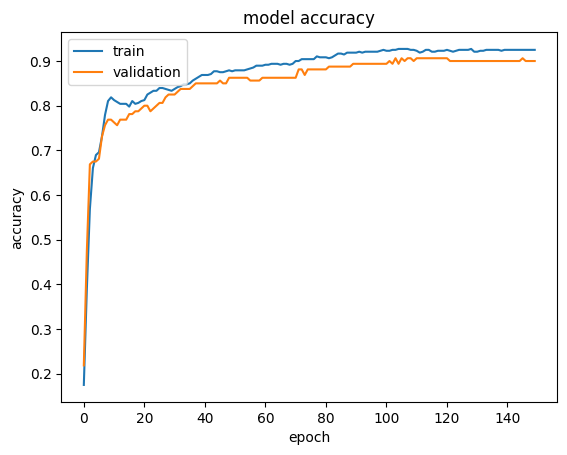

In [14]:
plot_acc(h2)

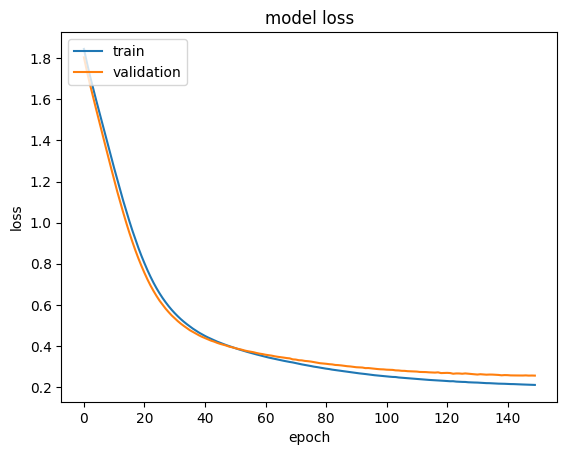

In [15]:
plot_loss(h2)

En la curva del accuracy para el conjunto de validación y el de entrenamiento se puede observar que a partir de cierta epoch el accuracy para el conjunto de entrenamiento converge o se estabiliza en un valor mayor que para el conjunto de validación lo que indica cierto overfitting.

Por otro ladoen la curva del loss vemos como aproximadamente en el epoch 50 se cruzan ambas curvas. A partir de ese epoch el loss para el conjunto de entrenamiento empieza a ser mejor (más bajo) que para el conjunto de validación lo que indica overfitting. Esto se podría utilizar para entrenar el modelo hasta el epoch 50 evitando así que el modelo sobreentrene.

# Modelo complejo con regularización

Por último implementamos la misma red neuronal anterior pero con regularización para evitar el overfitting. Antes de analizar los mismos parámetros que en los caso anteriores, experimentaremos con diferentes valores del coeficiente de regularización para elegir el óptimo.
 
*   Capa 1: 250 neuronas, función de activación relu
*   Capa 2: 100, relu
*   Capa 3: 6, lineal

El objetivo es observar 'overfitting' en el modelo debido a la complejidad de la red en comparación con la estructura de los datos que es relativamente simple. Para ello analizaremos los mismos parámetros que en el modelo anterior.

In [16]:
from tensorflow.keras.regularizers import L2
regularization_params = np.logspace(start = np.log10(0.00001), stop = np.log10(0.1), num = 15,base = 10)
training_acc = []
validation_acc = []
training_loss = []
validation_loss = []
for reg in regularization_params:
  print(reg)
  model3 = Sequential([
  Dense(units=250, activation='relu', kernel_regularizer=L2(reg)),
  Dense(units=100, activation='relu', kernel_regularizer=L2(reg)),
  Dense(units=6, activation='linear', kernel_regularizer=L2(reg))])
  model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  model3.fit(X_train,y_train,epochs=150,validation_data=(X_valid, y_valid), verbose = 0)
  training_acc.append(model3.evaluate(X_train,y_train, verbose = 0)[1])
  validation_acc.append(model3.evaluate(X_valid, y_valid, verbose = 0)[1])
  training_loss.append(model3.evaluate(X_train,y_train, verbose = 0)[0])
  validation_loss.append(model3.evaluate(X_valid, y_valid, verbose = 0)[0])

1e-05
1.9306977288832496e-05
3.727593720314938e-05
7.196856730011514e-05
0.00013894954943731373
0.00026826957952797245
0.0005179474679231213
0.001
0.0019306977288832496
0.003727593720314938
0.007196856730011514
0.013894954943731374
0.026826957952797246
0.05179474679231207
0.1


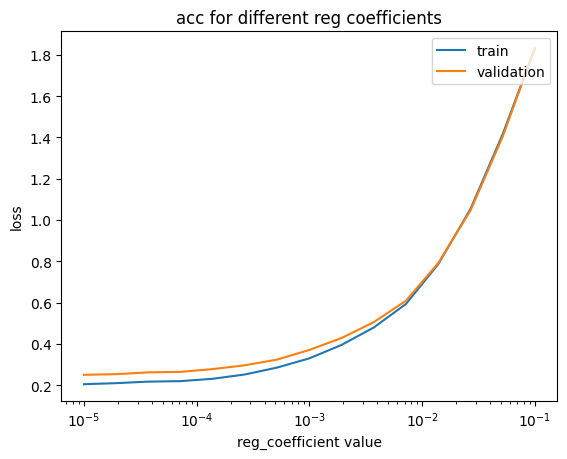

In [21]:
plt.plot(regularization_params,training_loss)
plt.plot(regularization_params,validation_loss)
plt.xscale('log')
plt.title('acc for different reg coefficients')
plt.ylabel('loss')
plt.xlabel('reg_coefficient value')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Hacemos 'zoom' en los 7 primeros coeficientes

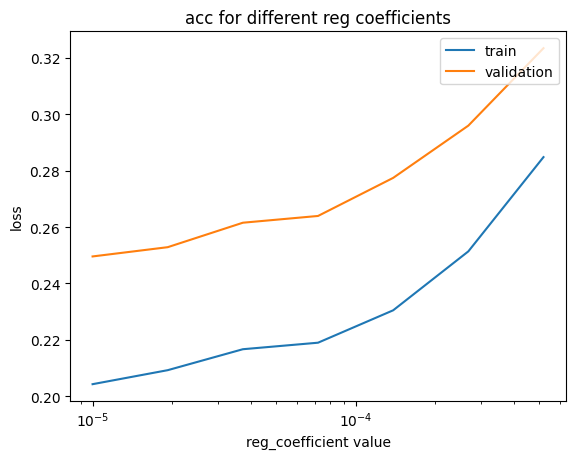

In [22]:
plt.plot(regularization_params[:7],training_loss[:7])
plt.plot(regularization_params[:7],validation_loss[:7])
plt.xscale('log')
plt.title('acc for different reg coefficients')
plt.ylabel('loss')
plt.xlabel('reg_coefficient value')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Debido a la simpleza del dataset no obtenemos la curva típica de loss del conjunto de validación en función del coeficiente de regularización. Atendiendo a los criterios habituales deberíamos elegir el coeficiente que minimiza el loss en el conjunto de validación (en este caso entre 0.00001 y 0.0001) sin embargo hemos observado que con estos coeficientes no se evita el sobreaprendizaje, por lo que hemos utilizado un valor mayor de 0.01 que hemos comprobado que evita el overfitting

In [27]:
loss_list_training_3 = []
loss_list_validation_3 = []
acc_list_training_3 = []
acc_list_validation_3 = []
for tam_train in range(10,len(X_train),10):
  print(tam_train)
  model3 = Sequential([
  Dense(units=250, activation='relu', kernel_regularizer=L2(0.01)),
  Dense(units=100, activation='relu', kernel_regularizer=L2(0.01)),
  Dense(units=6, activation='linear', kernel_regularizer=L2(0.01))])
  model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  h2 = model3.fit(X_train[:tam_train],y_train[:tam_train],epochs=150,validation_data=(X_valid, y_valid), verbose = 0)
  acc_list_training_3.append(model3.evaluate(X_train[:tam_train],y_train[:tam_train], verbose = 0)[1])
  acc_list_validation_3.append(model3.evaluate(X_valid, y_valid, verbose = 0)[1])
  loss_list_training_3.append(model3.evaluate(X_train[:tam_train],y_train[:tam_train], verbose = 0)[0])
  loss_list_validation_3.append(model3.evaluate(X_valid, y_valid, verbose = 0)[0])

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470


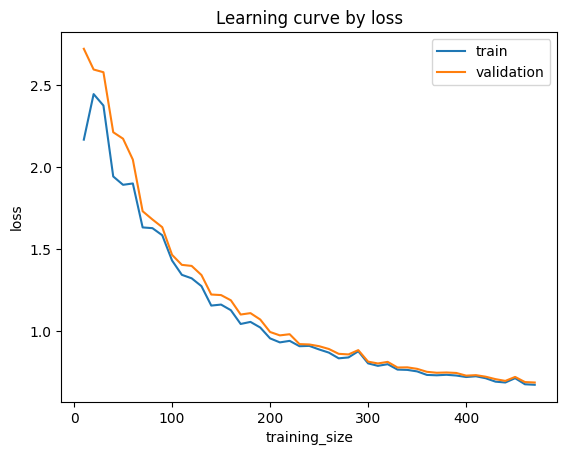

In [29]:
plot_learning_curve(range(10,len(X_train),10) ,loss_list_training_3,loss_list_validation_3)

Se puede observar en la curva de aprendizaje para el modelo regularizado que que no hay tanta varianza como en el caso anterior aunque se comporta de manera similar.

In [30]:
model3 = Sequential([
Dense(units=250, activation='relu', kernel_regularizer=L2(0.01)),
Dense(units=100, activation='relu', kernel_regularizer=L2(0.01)),
Dense(units=6, activation='linear', kernel_regularizer=L2(0.01))])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
h3 = model3.fit(X_train,y_train,epochs=150,validation_data=(X_valid, y_valid), verbose = 0)

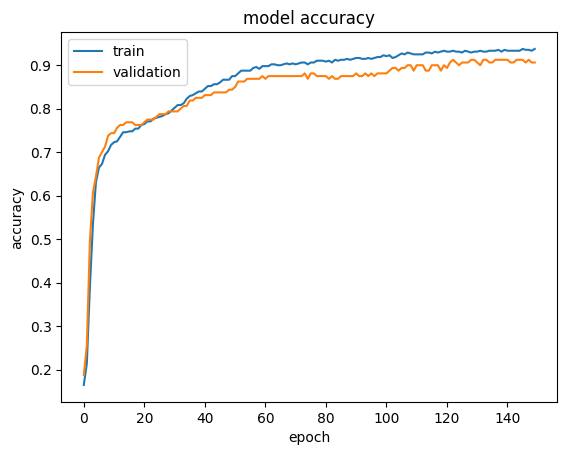

In [31]:
plot_acc(h3)

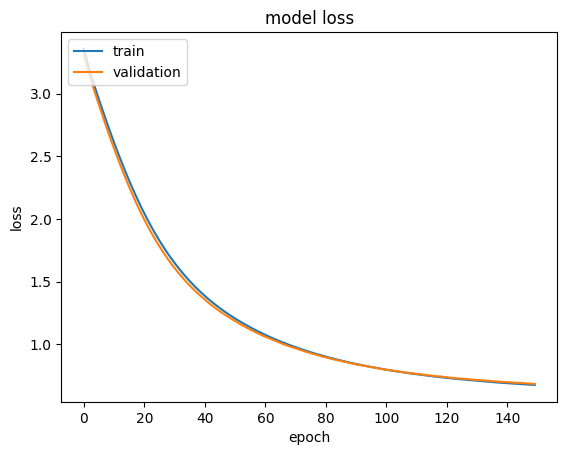

In [32]:
plot_loss(h3)

Se puede observar que no se produce el cruce entren las curvas del loss de los respectivos conjuntos tan pronto ni tan bruscamente (no hay un a separación clara después del cruce). Esta observación indica que hemos evitado en cierta medida el sobreentrenamiento del modelo anterior mediante la regularización.

In [33]:
model1.evaluate(X_test, y_test)
model2.evaluate(X_test, y_test)
model3.evaluate(X_test, y_test)


5/5 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.9187


[0.6844944357872009, 0.918749988079071]

Evaluando nuestros modelos con el conjunto de test observamos que todos funcionan relativamente bien ya que la estructura de los datos es simple y por tanto la tarea de clasificación es relativamente sencilla.

Aún así podemos observar una mejoría de los modelos complejos respecto a el simple. Con un conjunto de datos real (y por tanto más complicado) el modelo complejo debería funcionar peor que el modelo con regularización ya que se ajustaría más a los datos de entrenamiento en vez de generalizar para más casos.